In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
X = df.drop('class', axis=1)
y = df['class']

In [4]:
X = pd.get_dummies(X, drop_first=True)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
param_grid = {'n_estimators': [50,100], 'learning_rate': [0.1,0.05,0.2], 'max_depth': [3,4,5]}

In [9]:
gb_model = GradientBoostingClassifier()

In [10]:
grid = GridSearchCV(gb_model, param_grid)

In [11]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [13]:
preds = grid.predict(X_test)

In [14]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=50)

In [15]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [16]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [17]:
confusion_matrix(y_test, preds)

array([[444,   0],
       [  1, 368]], dtype=int64)

In [18]:
accuracy_score(y_test, preds)

0.998769987699877

In [19]:
feat_imp = grid.best_estimator_.feature_importances_

In [20]:
imp_feat = pd.DataFrame(index=X.columns, data=feat_imp, columns=['Importance'])

In [22]:
imp_feat = imp_feat[imp_feat['Importance']>0.0005]

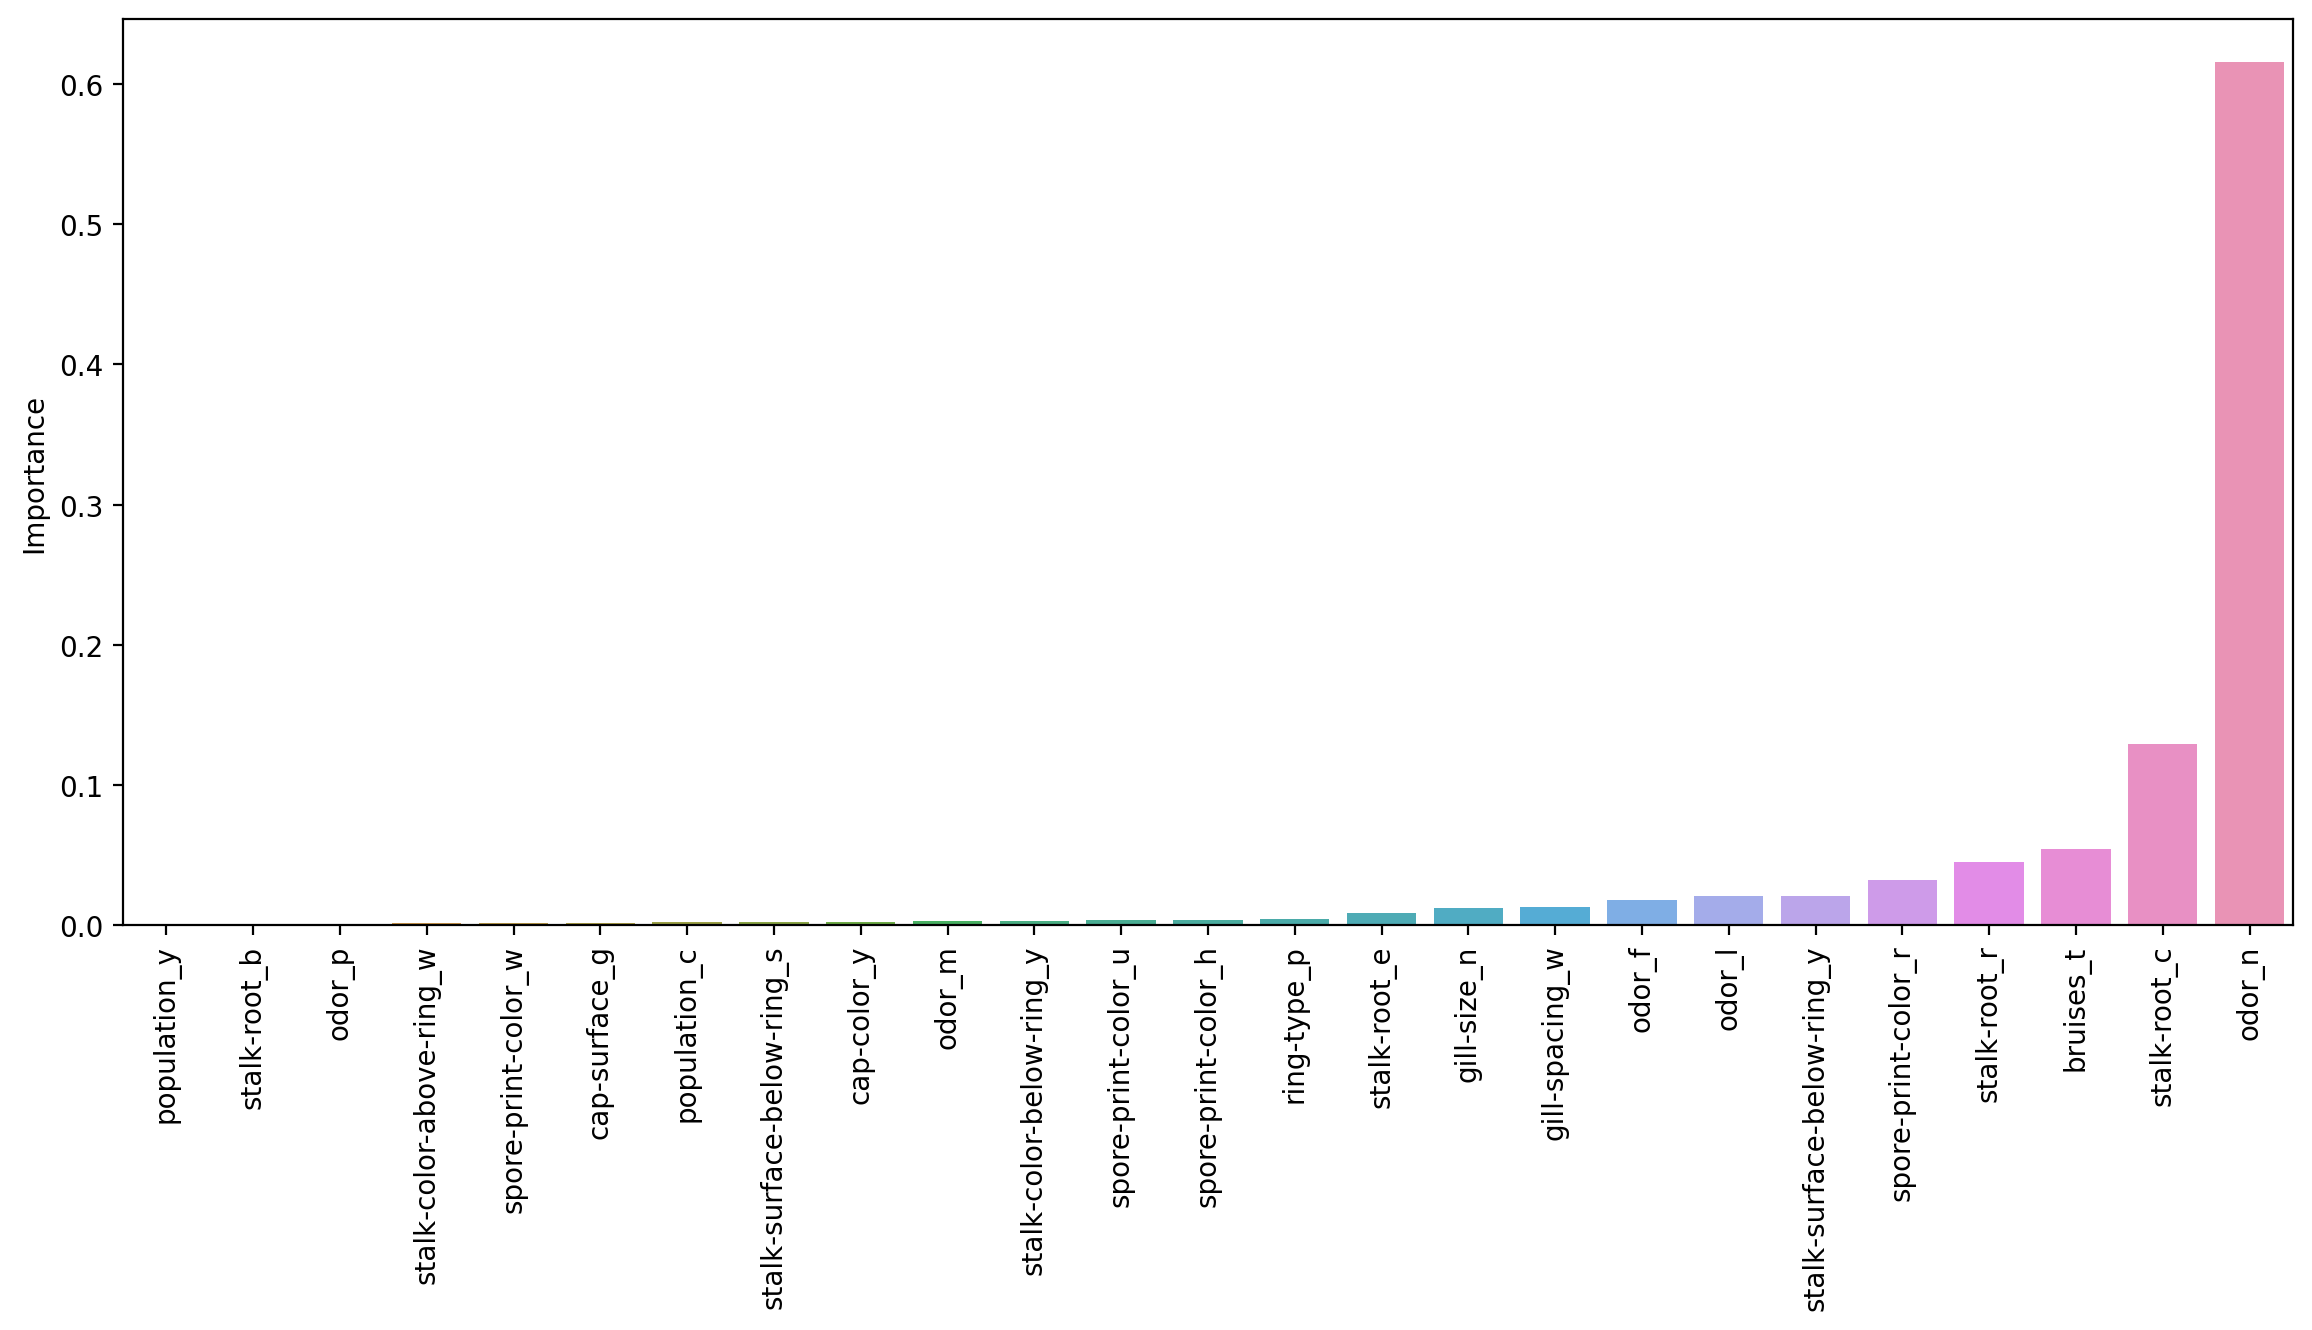

In [25]:
imp_feat = imp_feat.sort_values('Importance') 

plt.figure(figsize=(14,6), dpi=200)

sns.barplot(data=imp_feat,
            y='Importance',
            x = imp_feat.index)

plt.xticks(rotation=90);